In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 100,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = False))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 4
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 100, Accuracy: 0.8395061728395061, Loss: 0.6538583260995371
Checkpoint 200, Accuracy: 0.8333333333333334, Loss: 0.6641815326831959
Checkpoint 300, Accuracy: 0.845679012345679, Loss: 0.6659954918755425
Checkpoint 400, Accuracy: 0.8395061728395061, Loss: 0.662245856391059
Checkpoint 500, Accuracy: 0.8395061728395061, Loss: 0.6639078634756582


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.87366956]
 [0.09260823]
 [0.03372231]]
[1. 0. 0.] <-> [[0.85884696]
 [0.10248004]
 [0.03867301]]
[1. 0. 0.] <-> [[0.89835143]
 [0.07580148]
 [0.02584705]]
[1. 0. 0.] <-> [[0.8804975 ]
 [0.0880063 ]
 [0.03149614]]
[1. 0. 0.] <-> [[0.912434  ]
 [0.06598891]
 [0.02157704]]
[1. 0. 0.] <-> [[0.8906457 ]
 [0.08110029]
 [0.02825392]]
[0. 1. 0.] <-> [[0.7790482 ]
 [0.15320136]
 [0.06775049]]
[1. 0. 0.] <-> [[0.7373341 ]
 [0.17833944]
 [0.0843264 ]]
[1. 0. 0.] <-> [[0.89908504]
 [0.07529451]
 [0.02562047]]
[1. 0. 0.] <-> [[0.6956428 ]
 [0.20266496]
 [0.1016922 ]]
[1. 0. 0.] <-> [[0.70494485]
 [0.19730283]
 [0.09775228]]
[0. 0. 1.] <-> [[0.78528374]
 [0.1493692 ]
 [0.06534705]]
[1. 0. 0.] <-> [[0.9098298 ]
 [0.06781645]
 [0.02235379]]
[1. 0. 0.] <-> [[0.83793026]
 [0.11615147]
 [0.04591818]]
[1. 0. 0.] <-> [[0.36064973]
 [0.37202674]
 [0.26732352]]
[1. 0. 0.] <-> [[0.84733665]
 [0.11003948]
 [0.04262382]]
[0. 1. 0.] <-> [[0.722637  ]
 [0.18700182]
 [0.09036118]]
[0. 0. 1.] <->

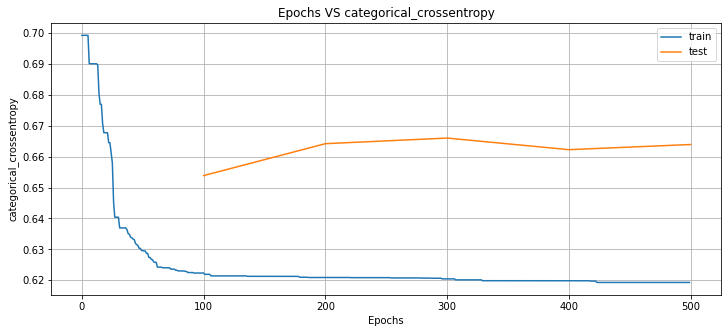

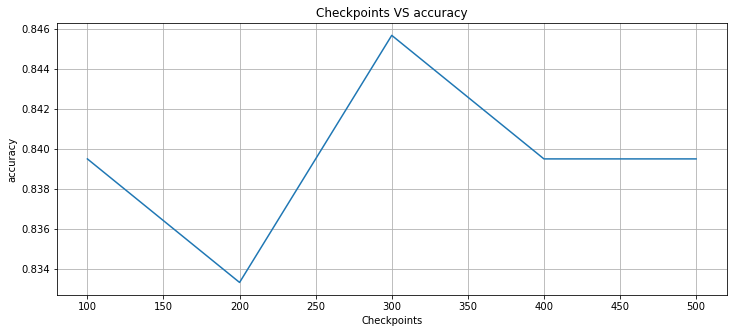

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [12]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8395061728395061, 'mean_square_error': 2.972221421618648, 'categorical_crossentropy': 0.6538583260995371, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 22, 'tn_hit': 8, 'fn_hit': 1}, 1: {'tp_hit': 2, 'fp_hit': 1, 'tn_hit': 91, 'fn_hit': 14}, 2: {'tp_hit': 3, 'fp_hit': 3, 'tn_hit': 91, 'fn_hit': 11}}, 'checkpoint': 100} 


{'accuracy': 0.8333333333333334, 'mean_square_error': 2.9689646315845435, 'categorical_crossentropy': 0.6641815326831959, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 23, 'tn_hit': 7, 'fn_hit': 0}, 1: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 16}, 2: {'tp_hit': 3, 'fp_hit': 4, 'tn_hit': 90, 'fn_hit': 11}}, 'checkpoint': 200} 


{'accuracy': 0.845679012345679, 'mean_square_error': 2.975335551285141, 'categorical_crossentropy': 0.6659954918755425, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 21, 'tn_hit': 9, 'fn_hit': 1}, 1: {'tp_hit': 3, 'fp_hit': 1, 'tn_hit': 91, 'fn_hit': 13}, 2: {'tp_hit': 3, 'fp_hit': 3, 'tn_hit': 91, 'fn_hit':

In [13]:
print(model)

Layer 1
Neuron 0: weights:
[[ 0.8364175 ]
 [-0.36434612]
 [-0.6580466 ]
 [-0.2638964 ]
 [-0.01215466]]
 bias: [1.1769621]

Neuron 1: weights:
[[-1.0261531 ]
 [-0.7651285 ]
 [ 0.61081886]
 [ 0.35348696]
 [ 1.410233  ]]
 bias: [0.54191583]

Neuron 2: weights:
[[ 0.3669005 ]
 [-0.010331  ]
 [ 1.0317152 ]
 [-1.9288363 ]
 [-0.79778564]]
 bias: [3.]

Neuron 3: weights:
[[-0.8330983 ]
 [-0.62110513]
 [ 0.52304846]
 [-0.07401828]
 [ 0.40347505]]
 bias: [1.2426953]

$
Layer 2
Neuron 0: weights:
[[ 0.95893776]
 [-1.7618371 ]
 [ 1.9729558 ]
 [ 1.2147218 ]]
 bias: [-2.3196514]

Neuron 1: weights:
[[ 0.6693968 ]
 [ 0.5715267 ]
 [-1.3892927 ]
 [-0.82013625]]
 bias: [-0.26751983]

Neuron 2: weights:
[[-0.7975344]
 [ 0.5678191]
 [-1.550506 ]
 [-1.9012723]]
 bias: [1.0815128]

$

